# Problem Statement:

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv("crime_data.csv")

# Data Exploration

In [3]:
data.shape

(50, 5)

In [4]:
data.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [5]:
data.tail()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
45       Virginia     8.5      156        63  20.7
46     Washington     4.0      145        73  26.2
47  West Virginia     5.7       81        39   9.3
48      Wisconsin     2.6       53        66  10.8
49        Wyoming     6.8      161        60  15.6

In [6]:
data.sample(5)

Unnamed: 0  Murder  Assault  UrbanPop  Rape
9      Georgia    17.4      211        60  25.8
29  New Jersey     7.4      159        89  18.8
1       Alaska    10.0      263        48  44.5
30  New Mexico    11.4      285        70  32.1
25     Montana     6.0      109        53  16.4

### Quick Data Check

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Statistical summary

In [8]:
data.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

### Identifying Missing Values

In [9]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

- There is no missing values in dataset

In [10]:
# Renaming column

data.rename(columns={'Unnamed: 0':'City'},inplace=True)
data.head()

City  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

# Data Visualization

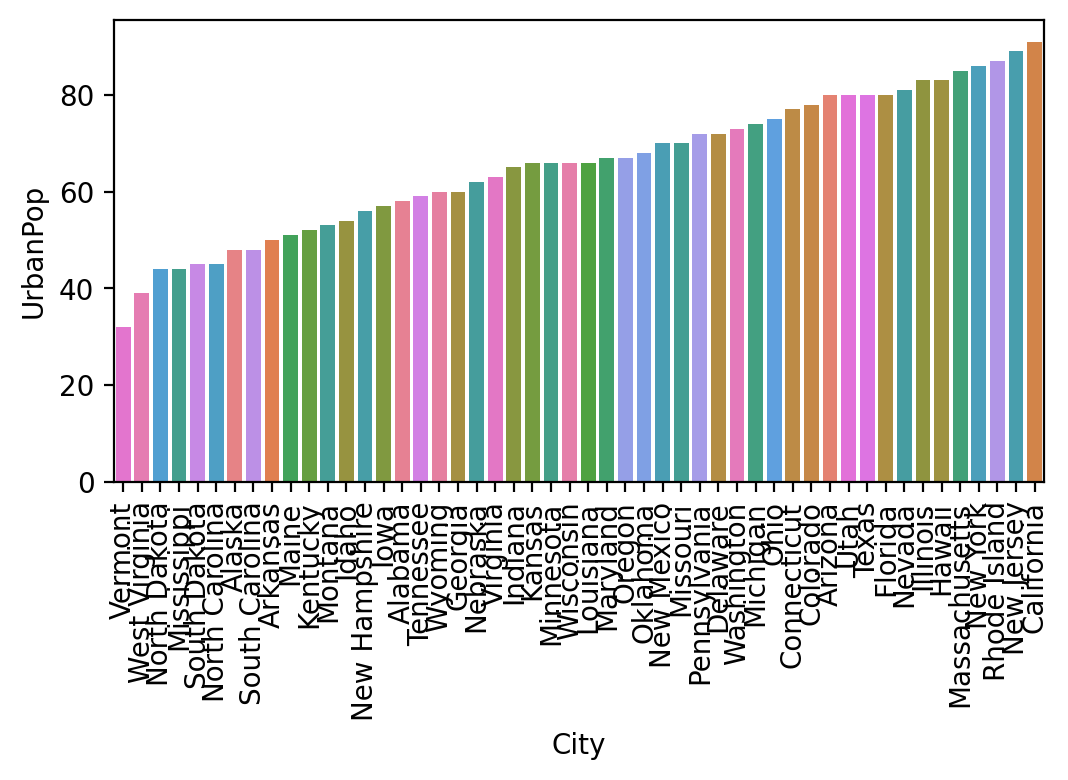

In [11]:
plt.figure(figsize=(6,3),dpi=200)
sns.barplot(data=data,x='City', y='UrbanPop',hue='City',order=data.sort_values('UrbanPop',ascending = True).City)
plt.xticks(rotation=90);

- We can see here Vermont city has less population compared to other cities where California is the largest population city

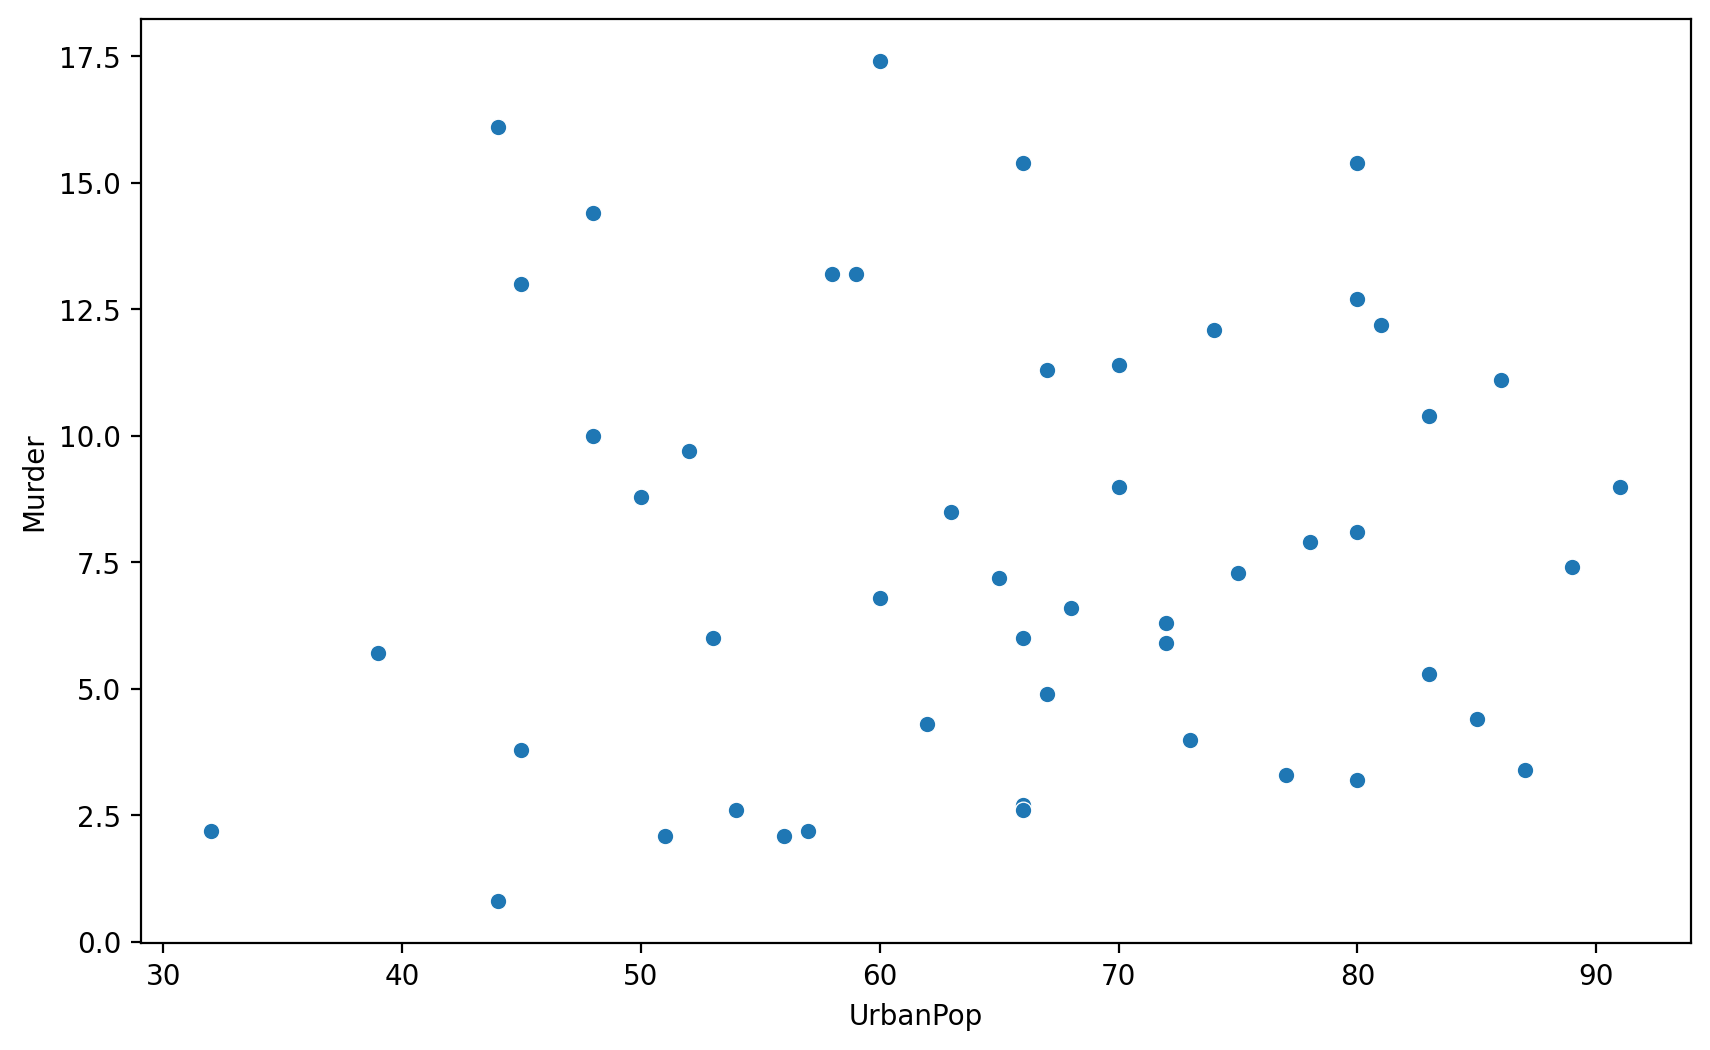

In [12]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=data,x='UrbanPop',y='Murder');

- The number of murders tends to increase slightly as the urban population grows.

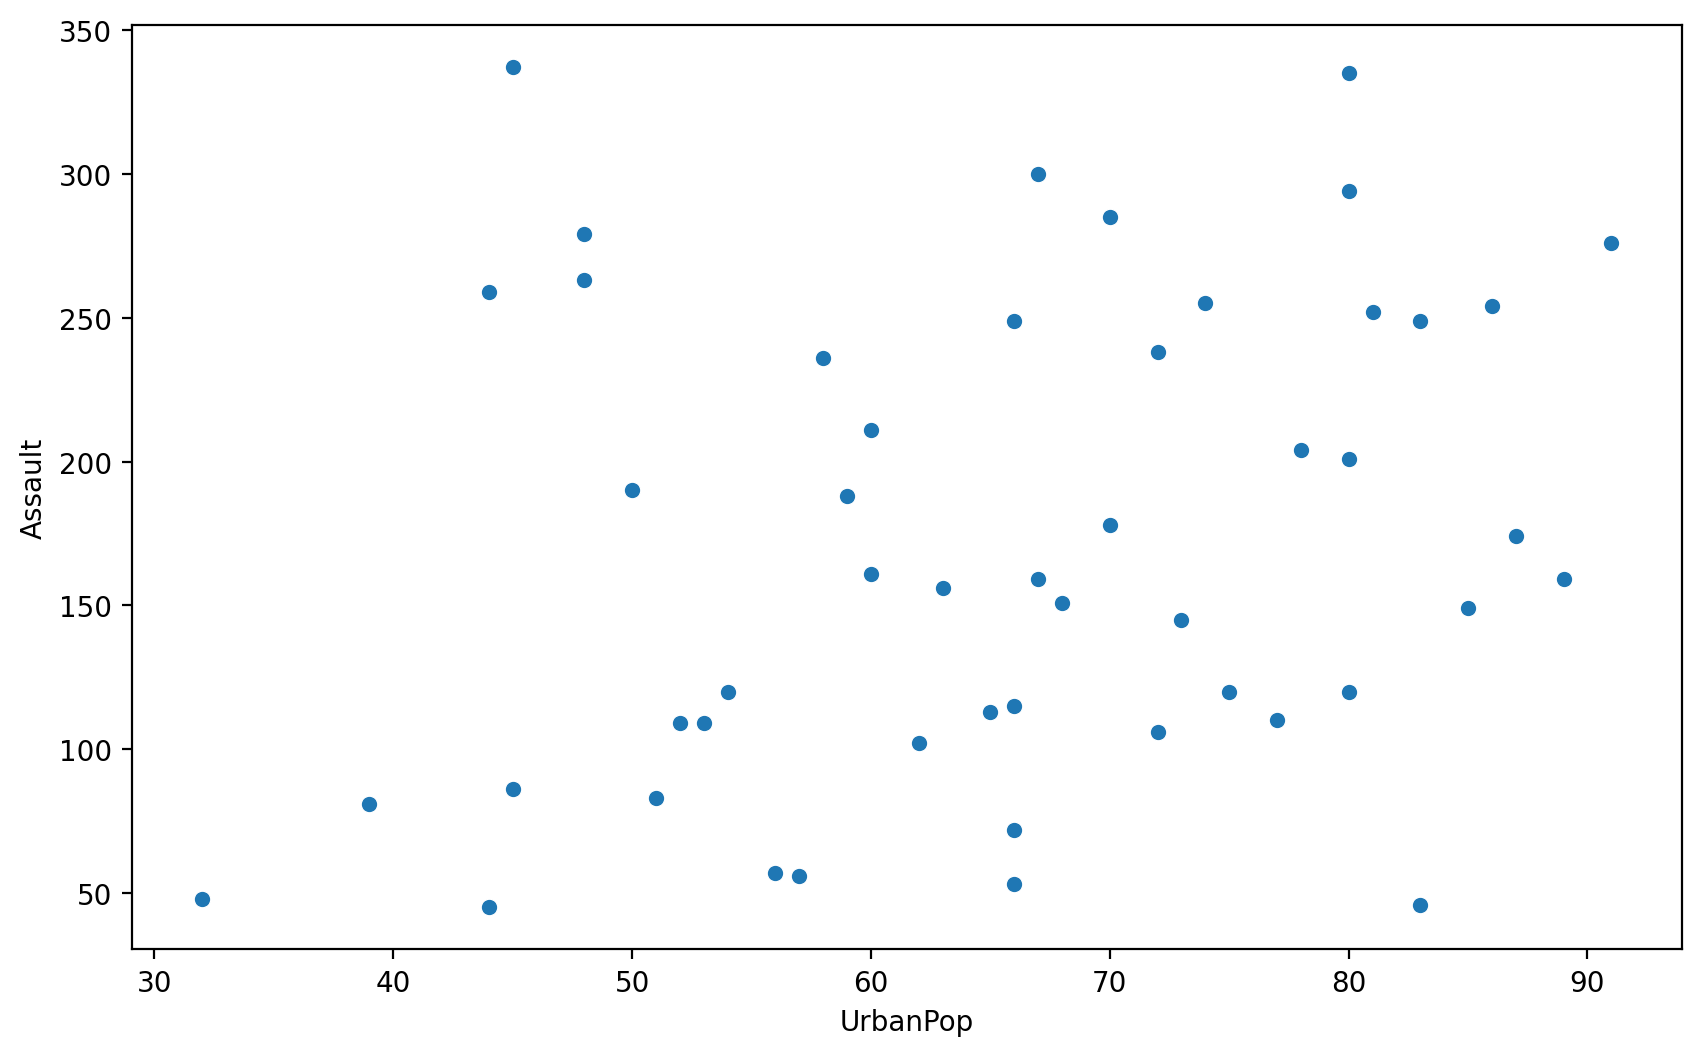

In [13]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=data,x='UrbanPop',y='Assault');

- There is a weak positive correlation between urban population and Assault rates.

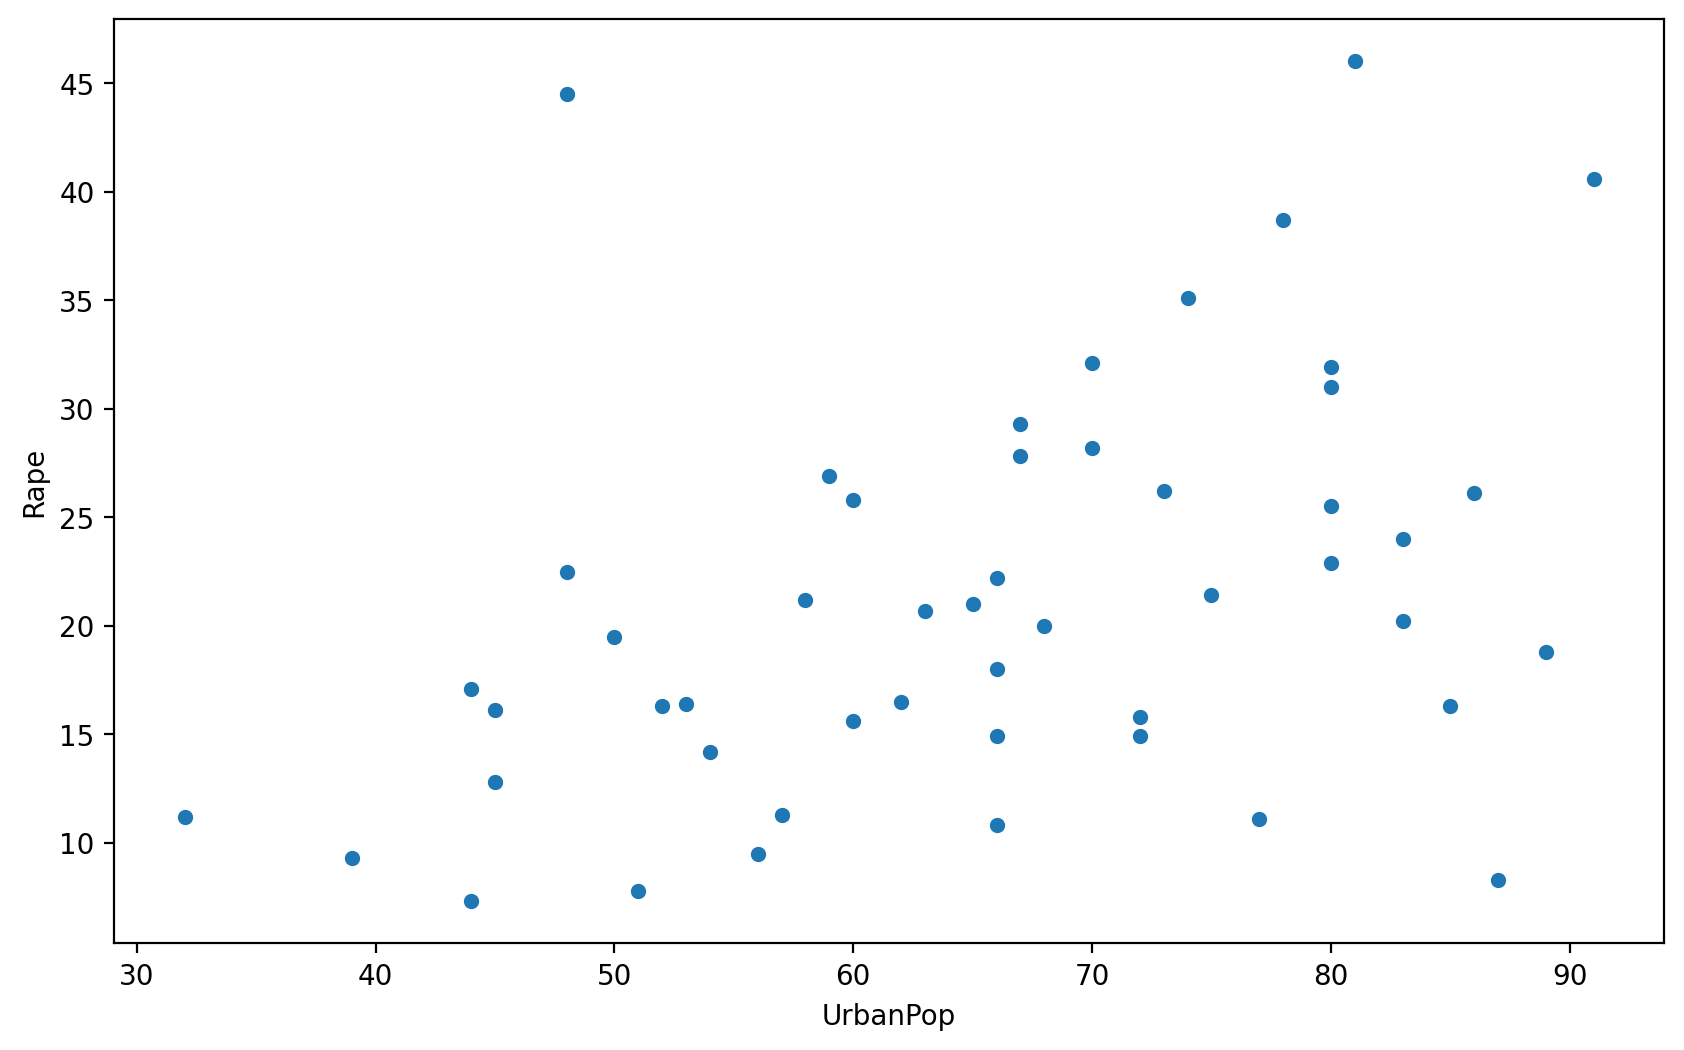

In [14]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=data,x='UrbanPop',y='Rape');

- There is a positive correlation between urban population and rape rates.

In [15]:
data[(data['Rape'] > 40) & (data['UrbanPop'] < 50)]

City  Murder  Assault  UrbanPop  Rape
1  Alaska    10.0      263        48  44.5

- The increase in Rape rate is associated with a increase in Urban Population.
- Alaska has the highest rape rate of all US cities, even though it has a relatively low urban population.

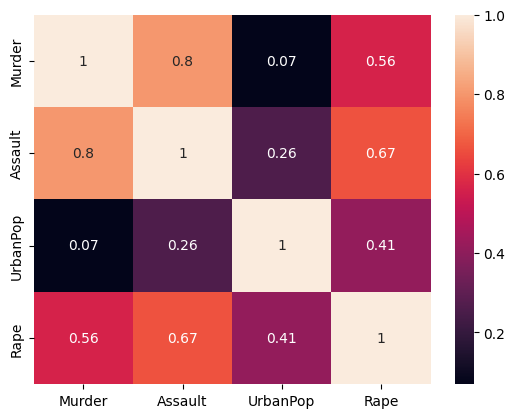

In [16]:
sns.heatmap(data.drop('City',axis=1).corr(),annot=True);

- There is a strong positive correlation between murder and assault (0.8). This means that places with high murder rates also tend to have high assault rates.- 
There is a moderate positive correlation between murder and urban population (0.56). This means that murder rates tend to be higher in urban areas than in rural areas
- 
There is a weak positive correlation between assault and urban population (0.26). This means that assault rates are slightly higher in urban areas than in rural are.
- .
There is a weak negative correlation between rape and murder (-0.2). This means that there is a slight negative association between rape and murder rates.

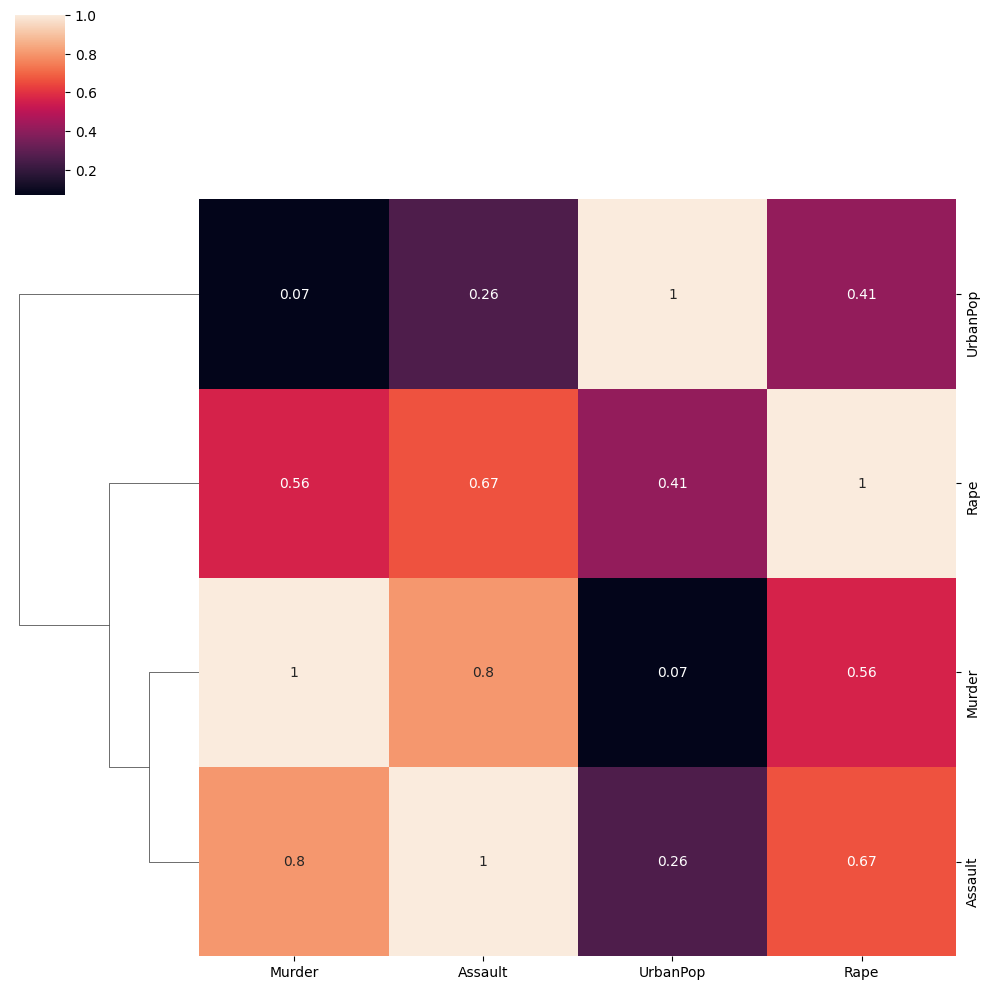

In [17]:
sns.clustermap(data.drop('City',axis=1).corr(),annot=True,col_cluster=False);

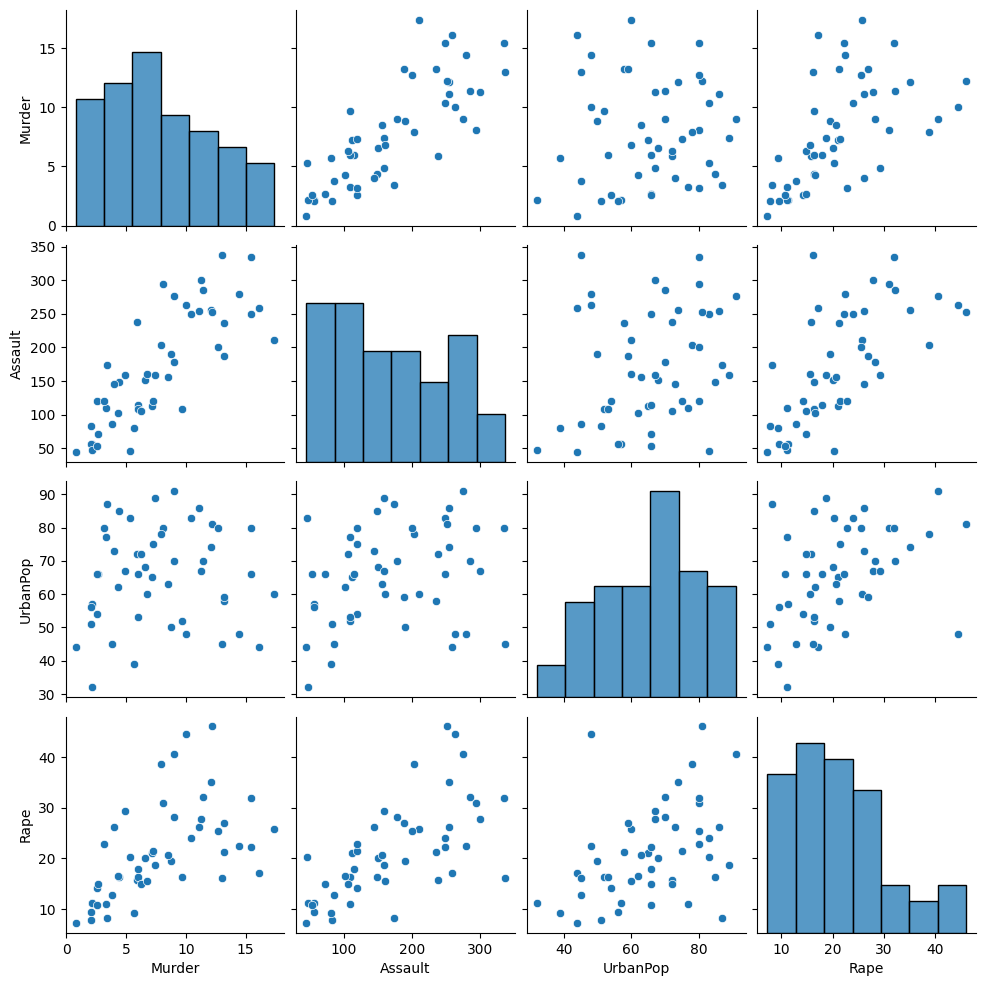

In [18]:
sns.pairplot(data=data);

### Creating New CSV file for geo locations.

In [19]:
# import geopy

# geolocator = geopy.geocoders.Nominatim(user_agent="Vijay")

In [20]:
# data['Longitude'] = None
# data['Latitude'] = None

In [21]:
# for i in range(len(data)):
#     location = geolocator.geocode(data['City'][i])
#     data['Longitude'][i] = location.longitude
#     data['Latitude'][i] = location.latitude

In [22]:
# data.head()

In [23]:
# data.to_csv('city_loc.csv')

In [24]:
citydata = pd.read_csv("city_loc.csv")

In [25]:
citydata.head()

Unnamed: 0        City  Murder  Assault  UrbanPop  Rape   Longitude  \
0           0     Alabama    13.2      236        58  21.2  -86.829534   
1           1      Alaska    10.0      263        48  44.5 -149.680909   
2           2     Arizona     8.1      294        80  31.0 -111.763275   
3           3    Arkansas     8.8      190        50  19.5  -92.447911   
4           4  California     9.0      276        91  40.6 -118.755997   

    Latitude  
0  33.258882  
1  64.445961  
2  34.395342  
3  35.204888  
4  36.701463

In [26]:
citydata = citydata.drop('Unnamed: 0',axis=1)

In [27]:
citydata.head()

City  Murder  Assault  UrbanPop  Rape   Longitude   Latitude
0     Alabama    13.2      236        58  21.2  -86.829534  33.258882
1      Alaska    10.0      263        48  44.5 -149.680909  64.445961
2     Arizona     8.1      294        80  31.0 -111.763275  34.395342
3    Arkansas     8.8      190        50  19.5  -92.447911  35.204888
4  California     9.0      276        91  40.6 -118.755997  36.701463

In [28]:
import plotly.express as px

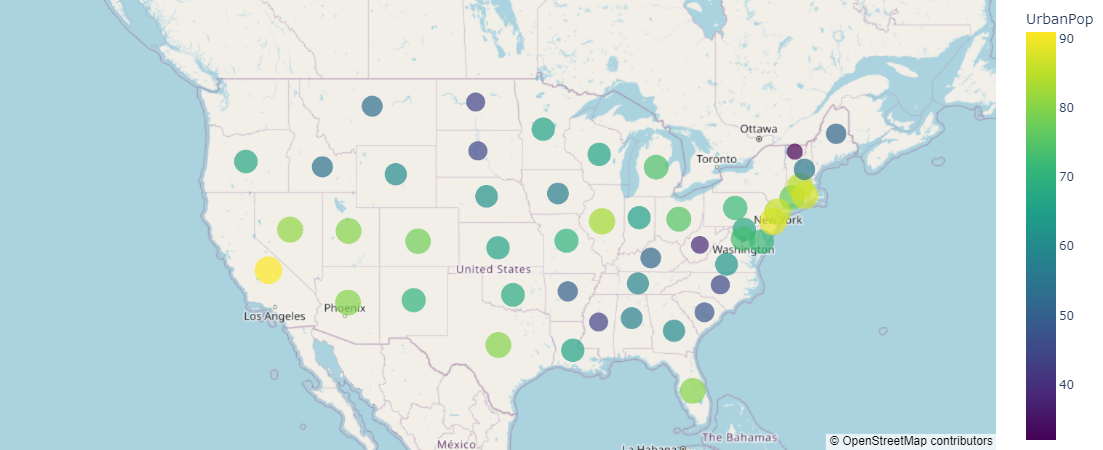

In [29]:
fig = px.scatter_mapbox(
    citydata,
    lat="Latitude",
    lon="Longitude",
    hover_name="City",
    zoom=3,
    center={"lat": 39.8283, "lon": -98.5795},
    mapbox_style="stamen-terrain",
    size='UrbanPop',
    color="UrbanPop",
    color_continuous_scale="Viridis",
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

- -------------------------------------------------------------------------------------------------------------------------

In [30]:
data1 = data.drop(columns=['City'])  # Drop city names for clustering

# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data1)

scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# K-Means Clustering

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
ssd = []
silhouette_scores = []

for k in range(2,20):
    
    model = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = model.fit_predict(scaled_data)
    
    score = silhouette_score(scaled_data, kmeans_labels)
    
    ssd.append(model.inertia_)
    silhouette_scores.append(score)

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of

(2.0, 20.0)

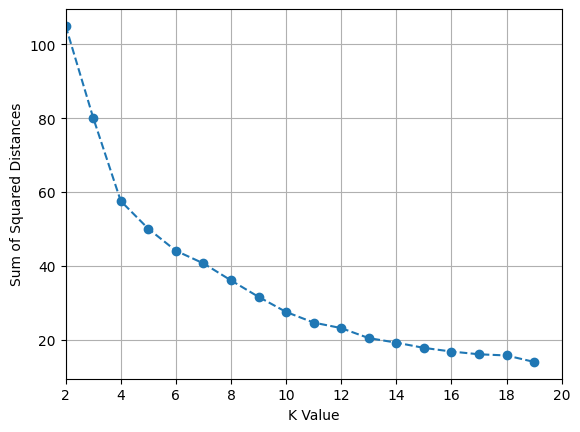

In [34]:
plt.plot(range(2,20),ssd,'o--')
plt.grid()
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')
plt.xlim(2,20)

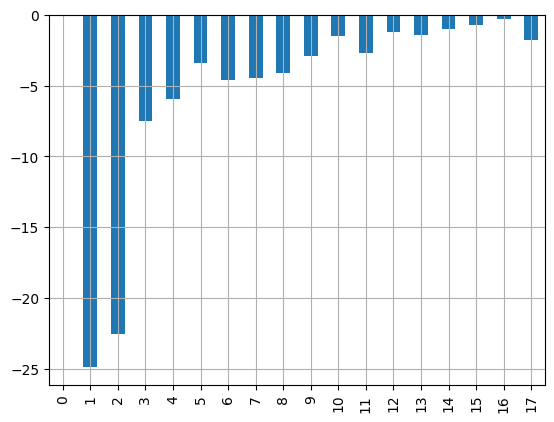

In [35]:
pd.Series(ssd).diff().plot(kind='bar')
plt.grid()

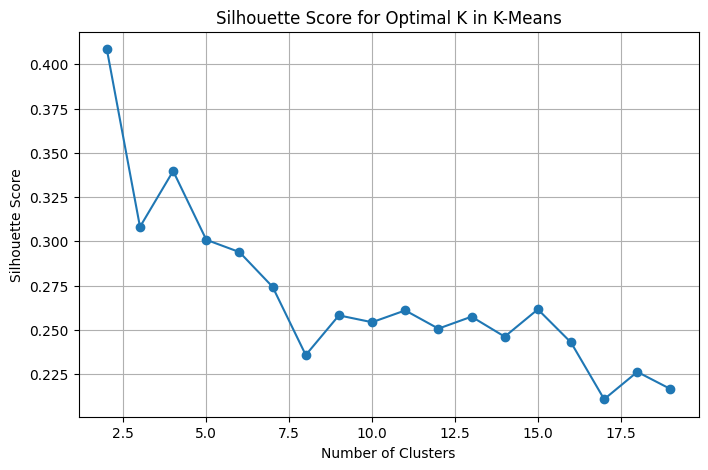

In [36]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K in K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [37]:
silhouette_scores

[0.4084890326217641,
 0.30813622648945616,
 0.33968891433344395,
 0.30083681265939805,
 0.29389356636617436,
 0.27424841352603585,
 0.23573504919906585,
 0.25814212487252086,
 0.2542706380422904,
 0.26094991107008825,
 0.2506501892368162,
 0.2574095333127484,
 0.24611719824364822,
 0.2615485575155744,
 0.24283260297816317,
 0.21077726267069224,
 0.22622130519457775,
 0.21654016253992256]

In [38]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

kmeans_labels = kmeans.fit_predict(scaled_data)

print("Optimal K value :",optimal_k)

Optimal K value : 2


C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [39]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [40]:
citydata['KMenas Labels'] = kmeans.labels_
citydata['KMenas Labels'].value_counts()

KMenas Labels
0    30
1    20
Name: count, dtype: int64

In [41]:
citydata.head(5)

City  Murder  Assault  UrbanPop  Rape   Longitude   Latitude  \
0     Alabama    13.2      236        58  21.2  -86.829534  33.258882   
1      Alaska    10.0      263        48  44.5 -149.680909  64.445961   
2     Arizona     8.1      294        80  31.0 -111.763275  34.395342   
3    Arkansas     8.8      190        50  19.5  -92.447911  35.204888   
4  California     9.0      276        91  40.6 -118.755997  36.701463   

   KMenas Labels  
0              1  
1              1  
2              1  
3              0  
4              1

In [42]:
citydata.drop('City',axis=1).corr()['KMenas Labels'].sort_values()

Latitude        -0.275699
Longitude       -0.108184
UrbanPop         0.162966
Rape             0.698565
Murder           0.828856
Assault          0.836191
KMenas Labels    1.000000
Name: KMenas Labels, dtype: float64

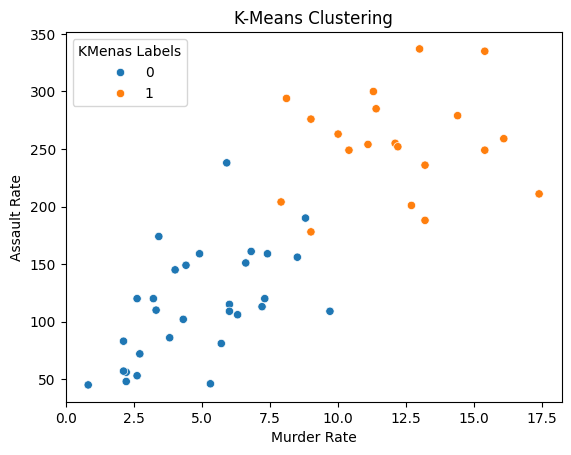

In [43]:
sns.scatterplot(data=citydata, x='Murder', y='Assault',hue='KMenas Labels')
plt.title('K-Means Clustering')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate');

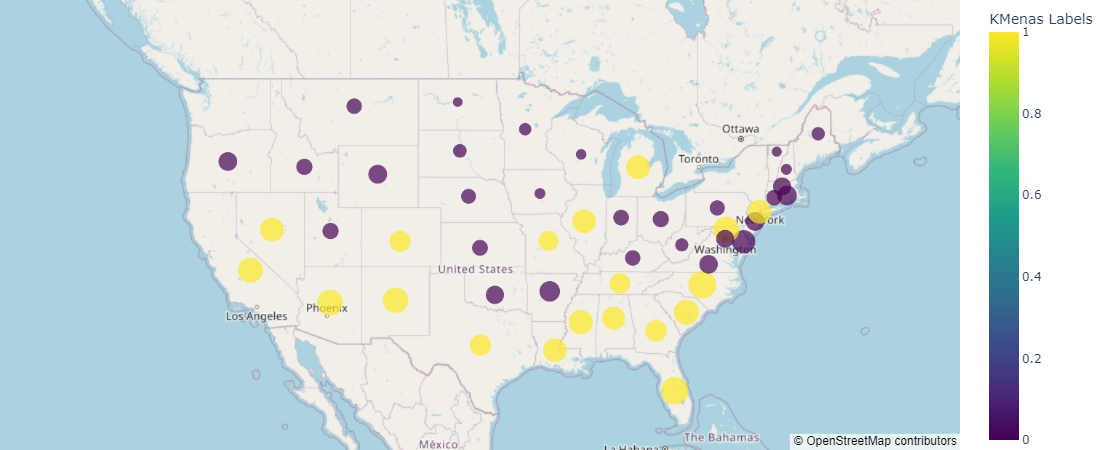

In [46]:
fig = px.scatter_mapbox(
    citydata,
    lat="Latitude",
    lon="Longitude",
    hover_name="City",
    zoom=3,
    center={"lat": 39.8283, "lon": -98.5795},
    mapbox_style="stamen-terrain",
    size='Assault',
    color="KMenas Labels",
    color_continuous_scale="viridis",
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### The K-Means clustering algorithm identified two clusters:

- Cluster 1: This cluster consists of 30 cities with low crime rates. These cities are all located in the northern and eastern United States.
- Cluster 2: This cluster consists of 20 cities with high crime rates. These cities are all located in the southern United States.

# Hierarchical Clustering

In [47]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [48]:
hierarchical_model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [49]:
hierarchy_labels = hierarchical_model.fit_predict(scaled_data)

In [50]:
hierarchy_labels

array([38, 31, 41, 28, 47, 35, 26, 27, 33, 29, 13, 34, 48, 23, 49, 30, 14,
       39, 42, 45, 36, 32, 46, 17, 43, 40, 16, 22, 37, 19, 18, 25, 44,  6,
        8, 21, 10, 24, 12, 11, 20,  9, 15,  7,  5,  4,  3,  2,  1,  0],
      dtype=int64)

In [51]:
linkage_matrix =  hierarchy.linkage(hierarchical_model.children_)

In [52]:
linkage_matrix

array([[ 4.        , 14.        ,  1.41421356,  2.        ],
       [46.        , 47.        ,  1.41421356,  2.        ],
       [20.        , 22.        ,  2.23606798,  2.        ],
       [24.        , 30.        ,  2.23606798,  2.        ],
       [25.        , 52.        ,  2.23606798,  3.        ],
       [33.        , 37.        ,  2.23606798,  2.        ],
       [44.        , 50.        ,  2.23606798,  3.        ],
       [38.        , 41.        ,  2.82842712,  2.        ],
       [11.        , 21.        ,  3.16227766,  2.        ],
       [ 0.        ,  1.        ,  3.60555128,  2.        ],
       [18.        , 28.        ,  3.60555128,  2.        ],
       [ 6.        , 19.        ,  3.60555128,  2.        ],
       [ 8.        , 17.        ,  3.60555128,  2.        ],
       [35.        , 39.        ,  3.60555128,  2.        ],
       [ 9.        , 60.        ,  4.12310563,  3.        ],
       [34.        , 36.        ,  4.12310563,  2.        ],
       [23.        , 51.

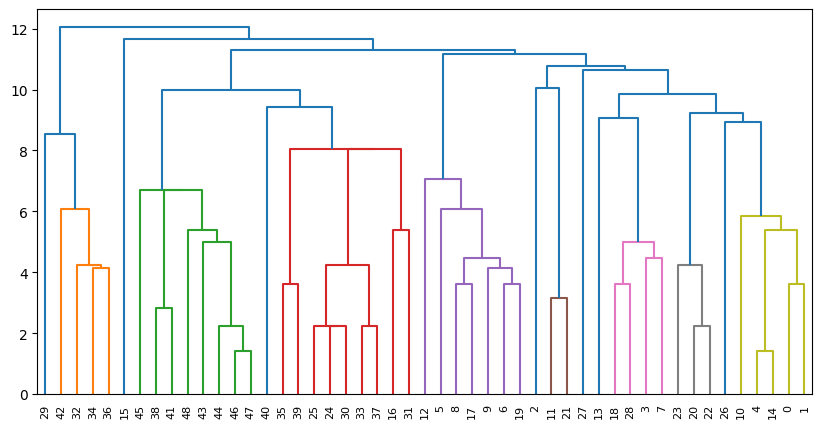

In [53]:
plt.figure(figsize=(10,5))
dendro = dendrogram(linkage_matrix)

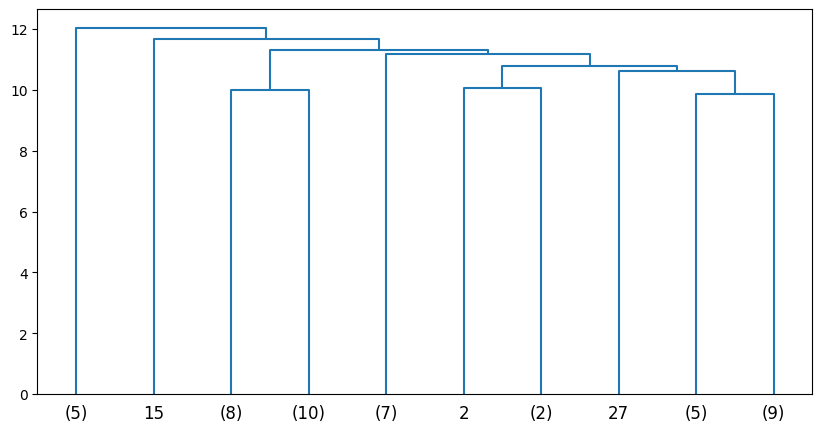

In [54]:
plt.figure(figsize=(10,5))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

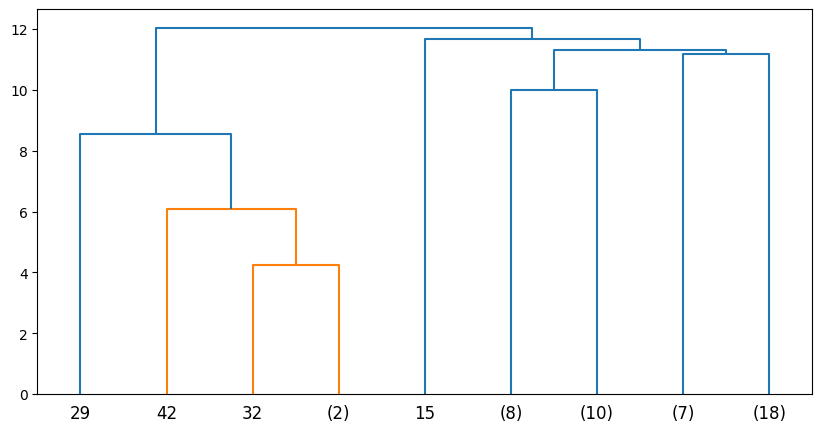

In [55]:
plt.figure(figsize=(10,5))
dendro = dendrogram(linkage_matrix,truncate_mode='level',p=3)

In [56]:
# Calculate linkage matrix
linked = linkage(scaled_data, method='ward')

In [57]:
# Initialize an array to store the SSD for different numbers of clusters
ssd = []

# Iterate through different numbers of clusters
for k in range(1, 11):  # You can adjust the range as needed
    # Perform hierarchical clustering and assign labels
    labels = fcluster(linked, k, criterion='maxclust')
    
    # Calculate the centroids of each cluster
    centroids = [data1[labels == i].mean(axis=0) for i in range(1, k + 1)]
    
    # Calculate the SSD
    cluster_ssd = sum(((data1[labels == i] - centroids[i - 1]) ** 2).sum() for i in range(1, k + 1))
    ssd.append(cluster_ssd)

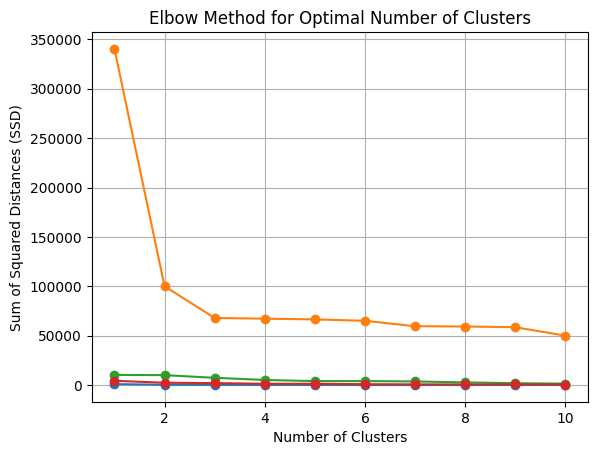

In [58]:
# Plot the SSD versus the number of clusters
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()

- The elbow method suggests that the data is best represented by two clusters.

In [59]:
hierarchical_model = AgglomerativeClustering(n_clusters=2)

In [60]:
hierarchy_labels = hierarchical_model.fit_predict(scaled_data)

In [61]:
hierarchy_labels

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
citydata['Hierarchical Labels'] = hierarchical_model.labels_
citydata['Hierarchical Labels'].value_counts()

Hierarchical Labels
0    31
1    19
Name: count, dtype: int64

In [63]:
citydata.head(5)

City  Murder  Assault  UrbanPop  Rape   Longitude   Latitude  \
0     Alabama    13.2      236        58  21.2  -86.829534  33.258882   
1      Alaska    10.0      263        48  44.5 -149.680909  64.445961   
2     Arizona     8.1      294        80  31.0 -111.763275  34.395342   
3    Arkansas     8.8      190        50  19.5  -92.447911  35.204888   
4  California     9.0      276        91  40.6 -118.755997  36.701463   

   KMenas Labels  Hierarchical Labels  
0              1                    1  
1              1                    1  
2              1                    1  
3              0                    0  
4              1                    1

In [64]:
citydata.drop(['City','KMenas Labels'],axis=1).corr()['Hierarchical Labels'].sort_values()

Latitude              -0.274290
Longitude             -0.109565
UrbanPop               0.151655
Rape                   0.674093
Murder                 0.824977
Assault                0.840347
Hierarchical Labels    1.000000
Name: Hierarchical Labels, dtype: float64

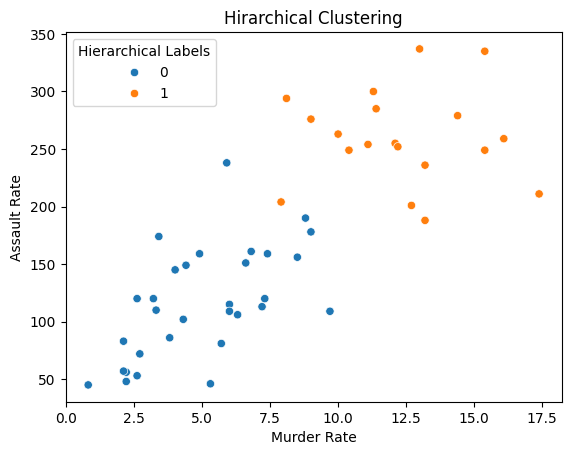

In [65]:
sns.scatterplot(data=citydata, x='Murder', y='Assault',hue='Hierarchical Labels')
plt.title('Hirarchical Clustering')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate');

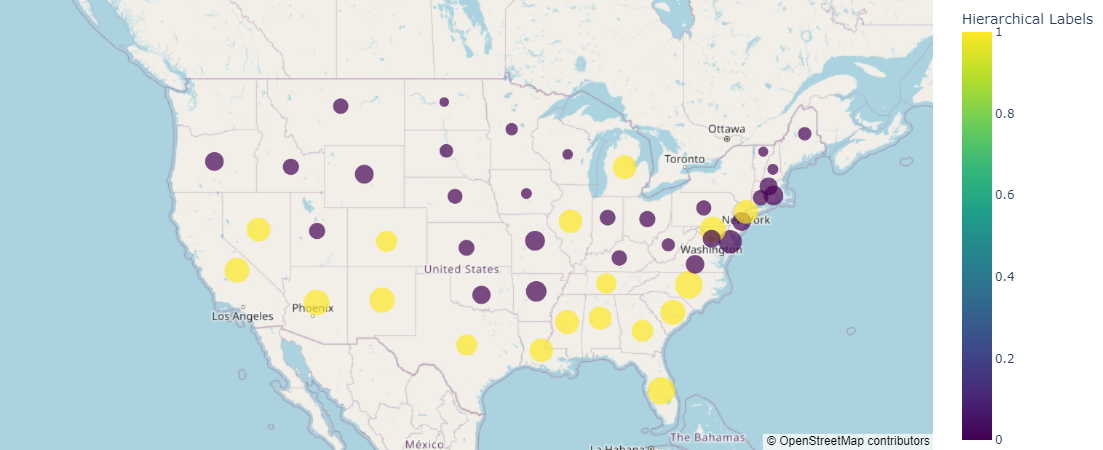

In [66]:
fig = px.scatter_mapbox(
    citydata,
    lat="Latitude",
    lon="Longitude",
    hover_name="City",
    zoom=3,
    center={"lat": 39.8283, "lon": -98.5795},
    mapbox_style="stamen-terrain",
    size='Assault',
    color="Hierarchical Labels",
    color_continuous_scale="Viridis",
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### The Hierarchical clustering algorithm identified two clusters:

- Cluster 1: This cluster consists of 31 cities with low crime rates. These cities are all located in the northern and eastern United States.
- Cluster 2: This cluster consists of 19 cities with high crime rates. These cities are all located in the southern United States.

# DBSCAN clustering

In [67]:
from sklearn.cluster import DBSCAN

In [68]:
dbscan = DBSCAN()

In [69]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_data.shape[1])
    dbscan.fit(scaled_data)
    
    percent_outliers = 100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(percent_outliers)

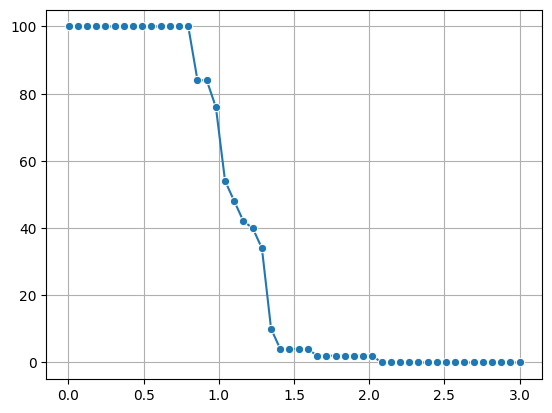

In [70]:
sns.lineplot(x=np.linspace(0.001,3,50), y=outlier_percent,marker='o')
plt.grid()

- Based on the plot created previously, retraining a DBSCAN model with a reasonable epsilon value.

In [71]:
dbscan = DBSCAN(eps=1.0,min_samples=scaled_data.shape[1])

In [72]:
dbscan.fit(scaled_data)

DBSCAN(eps=1.0, min_samples=4)

In [73]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [74]:
# # Load the cluster labels
# dbscan_labels = dbscan.labels_

# # Create a scatter plot of the data, colored by cluster membership
# plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)

# # Add axis labels and a title
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("K-Means Clustering")

# # Show the plot
# plt.show()

In [75]:
citydata['DBSCAN Labels'] = dbscan.labels_
citydata['DBSCAN Labels'].value_counts()

DBSCAN Labels
 1    28
-1    18
 0     4
Name: count, dtype: int64

In [76]:
citydata.head()

City  Murder  Assault  UrbanPop  Rape   Longitude   Latitude  \
0     Alabama    13.2      236        58  21.2  -86.829534  33.258882   
1      Alaska    10.0      263        48  44.5 -149.680909  64.445961   
2     Arizona     8.1      294        80  31.0 -111.763275  34.395342   
3    Arkansas     8.8      190        50  19.5  -92.447911  35.204888   
4  California     9.0      276        91  40.6 -118.755997  36.701463   

   KMenas Labels  Hierarchical Labels  DBSCAN Labels  
0              1                    1              0  
1              1                    1             -1  
2              1                    1             -1  
3              0                    0             -1  
4              1                    1             -1

In [77]:
citydata.drop(['City','KMenas Labels','Hierarchical Labels' ],axis=1).corr()['DBSCAN Labels'].sort_values()

Assault         -0.780340
Murder          -0.696604
Rape            -0.641792
UrbanPop        -0.228239
Longitude        0.246273
Latitude         0.369132
DBSCAN Labels    1.000000
Name: DBSCAN Labels, dtype: float64

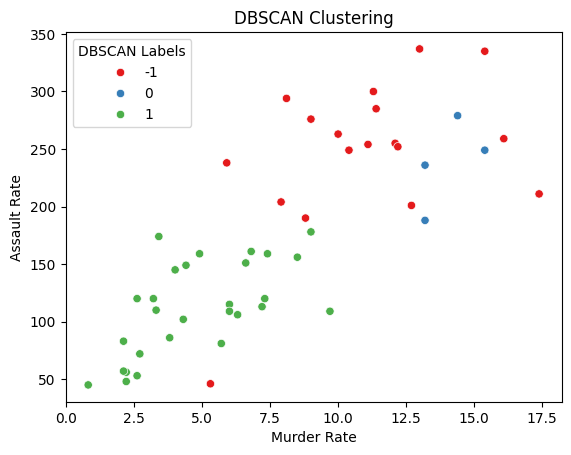

In [78]:
sns.scatterplot(data=citydata, x='Murder', y='Assault',hue='DBSCAN Labels',palette='Set1')
plt.title('DBSCAN Clustering')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate');

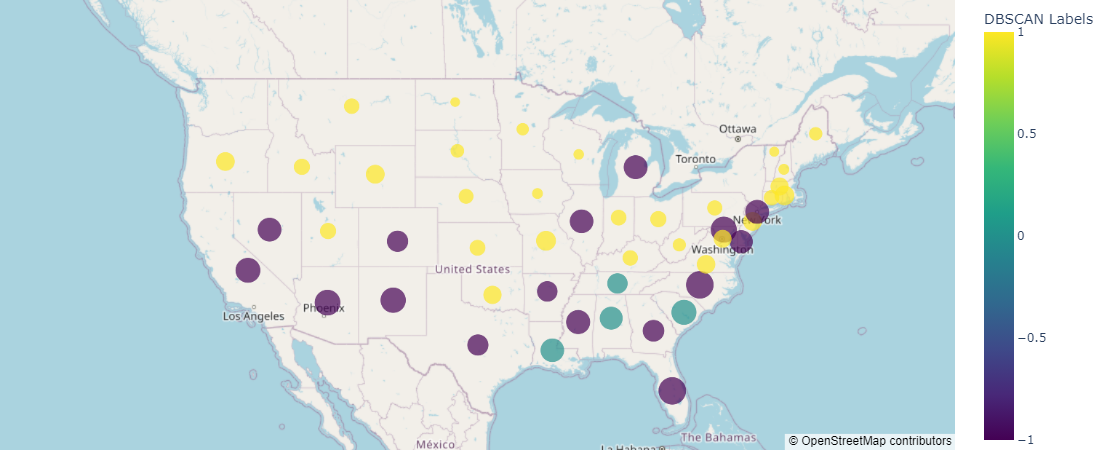

In [79]:
fig = px.scatter_mapbox(
    citydata,
    lat="Latitude",
    lon="Longitude",
    hover_name="City",
    zoom=3,
    center={"lat": 39.8283, "lon": -98.5795},
    mapbox_style="stamen-terrain",
    size='Assault',
    color="DBSCAN Labels",
    color_continuous_scale="Viridis",
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### The DBSCAN clustering algorithm identified two clusters:

- Cluster 1: This cluster consists of 28 cities with low crime rates. These cities are all located in the northern and eastern United States.
- Cluster 2: This cluster consists of 18 cities with high crime rates. These cities are all located in the southern United States.

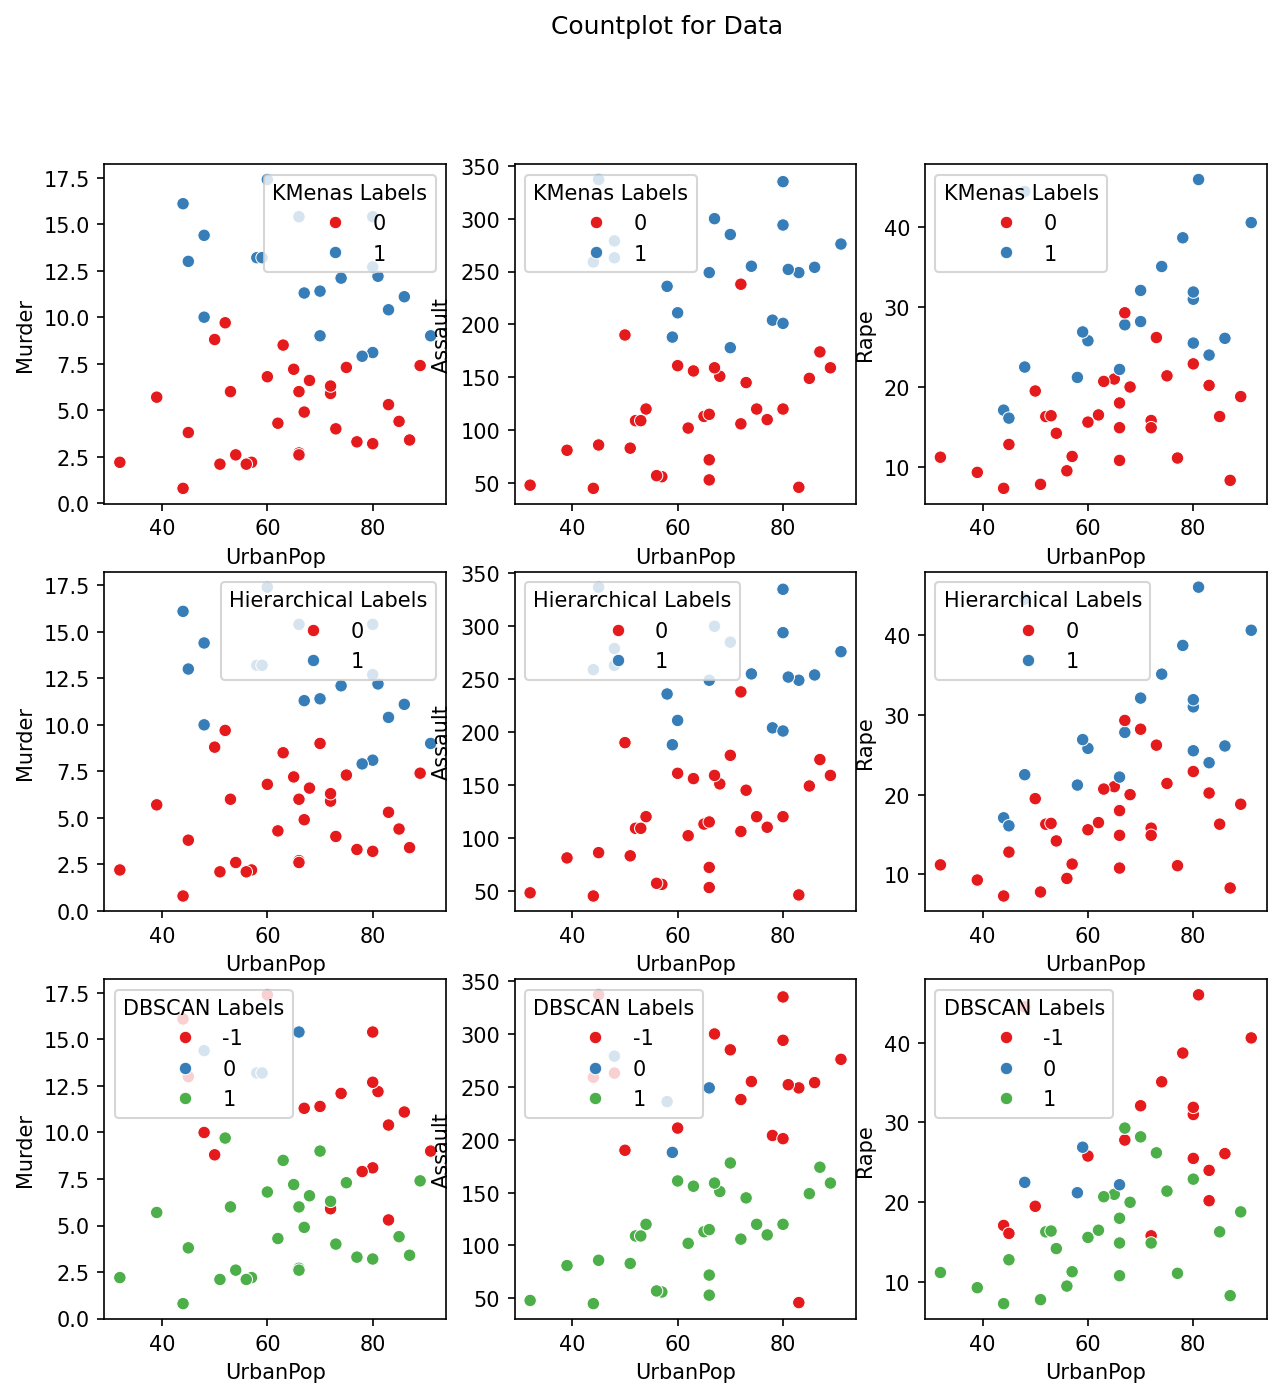

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10),dpi=150)
 
fig.suptitle('Countplot for Data')

sns.scatterplot(ax=axes[0, 0], data=citydata, x='UrbanPop', y='Murder', hue='KMenas Labels', palette='Set1')
sns.scatterplot(ax=axes[0, 1], data=citydata, x='UrbanPop', y='Assault', hue='KMenas Labels', palette='Set1')
sns.scatterplot(ax=axes[0, 2], data=citydata, x='UrbanPop', y='Rape', hue='KMenas Labels', palette='Set1')

sns.scatterplot(ax=axes[1, 0], data=citydata, x='UrbanPop', y='Murder', hue='Hierarchical Labels', palette='Set1')
sns.scatterplot(ax=axes[1, 1], data=citydata, x='UrbanPop', y='Assault', hue='Hierarchical Labels', palette='Set1')
sns.scatterplot(ax=axes[1, 2], data=citydata, x='UrbanPop', y='Rape', hue='Hierarchical Labels', palette='Set1')

sns.scatterplot(ax=axes[2, 0], data=citydata, x='UrbanPop', y='Murder', hue='DBSCAN Labels', palette='Set1')
sns.scatterplot(ax=axes[2, 1], data=citydata, x='UrbanPop', y='Assault', hue='DBSCAN Labels', palette='Set1')
sns.scatterplot(ax=axes[2, 2], data=citydata, x='UrbanPop', y='Rape', hue='DBSCAN Labels', palette='Set1');

# Overall Insights

- All three clustering algorithms identified two main clusters of cities: one cluster with high crime rates and one cluster with low crime rates. The cities with high crime rates are mostly located in the southern and western United States, while the cities with low crime rates are mostly located in the northern and eastern United States.

- This suggests that there may be regional factors that contribute to crime rates. For example, the southern and western United States tend to have higher levels of poverty and inequality, which are both known risk factors for crime. Additionally, the southern and western United States may have different cultural norms and attitudes towards violence.

- It is important to note that these are just general insights from clustering. More research is needed to understand the complex factors that contribute to crime rates in different cities and regions.